# <center>Kiss Dániel Márk</center>
## <center>WP871Q</center>

# Library import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score

# Data import

In [2]:
df_verseny_public_train = pd.read_csv('data/verseny_public_train.csv', sep=',', low_memory=False)

# Data familirsation

In [3]:
df_verseny_public_train

,cookie_id,Topic1_ic,Topic1_ec,Topic2_ic,Topic2_ec,Topic3_ic,Topic3_ec,Topic4_ic,Topic4_ec,Topic5_ic,...,Topic177_ec,Topic178_ic,Topic178_ec,Topic179_ic,Topic179_ec,Topic180_ic,Topic180_ec,Topic181_ic,Topic181_ec,target
0,100000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,8,57,0,0,15,43,0,...,0,0,0,0,0,0,0,0,0,0
2,100002,0,0,0,0,8,50,8,50,0,...,0,0,0,0,0,0,0,0,0,0
3,100003,15,15,8,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100004,0,0,8,15,0,0,15,15,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,0,0,0,0,127,1,8,1,22,...,0,0,0,0,0,0,0,0,0,0
99996,199996,50,8,0,0,57,1,50,8,50,...,0,0,0,0,0,0,0,0,0,0
99997,199997,15,127,0,0,22,1,71,120,8,...,0,0,0,0,0,0,0,0,0,0
99998,199998,8,8,0,0,43,1,8,64,8,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_verseny_public_train.describe()

,cookie_id,Topic1_ic,Topic1_ec,Topic2_ic,Topic2_ec,Topic3_ic,Topic3_ec,Topic4_ic,Topic4_ec,Topic5_ic,...,Topic177_ec,Topic178_ic,Topic178_ec,Topic179_ic,Topic179_ec,Topic180_ic,Topic180_ec,Topic181_ic,Topic181_ec,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.000000
mean,149999.500000,8.798000,16.085980,1.066320,7.923940,19.105870,8.563590,15.600520,23.712400,4.927330,...,0.002190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015000
std,28867.657797,23.308133,48.515646,5.824816,50.279646,42.710725,40.371399,31.981042,54.356458,17.719046,...,0.501804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121553
min,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,124999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,149999.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,174999.250000,8.000000,8.000000,0.000000,0.000000,22.000000,1.000000,15.000000,22.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,199999.000000,477.000000,1548.000000,610.000000,1576.000000,631.000000,1506.000000,603.000000,1632.000000,512.000000,...,134.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [5]:
df_verseny_public_train.columns

Index(['cookie_id', 'Topic1_ic', 'Topic1_ec', 'Topic2_ic', 'Topic2_ec',
       'Topic3_ic', 'Topic3_ec', 'Topic4_ic', 'Topic4_ec', 'Topic5_ic',
       ...
       'Topic177_ec', 'Topic178_ic', 'Topic178_ec', 'Topic179_ic',
       'Topic179_ec', 'Topic180_ic', 'Topic180_ec', 'Topic181_ic',
       'Topic181_ec', 'target'],
      dtype='object', length=258)

# Feature importance

## Decision Tree

Feature ranking:
1. Feature 59 (0.034382) Topic42_ec
2. Feature 82 (0.030857) Topic63_ic
3. Feature 17 (0.029825) Topic12_ec
4. Feature 7 (0.026783) Topic4_ec
5. Feature 68 (0.026546) Topic55_ic
6. Feature 83 (0.025374) Topic63_ec
7. Feature 6 (0.023795) Topic4_ic
8. Feature 21 (0.023135) Topic14_ec
9. Feature 66 (0.022146) Topic54_ic
10. Feature 16 (0.020672) Topic12_ic
11. Feature 70 (0.019442) Topic56_ic
12. Feature 61 (0.018478) Topic51_ec
13. Feature 19 (0.018344) Topic13_ec
14. Feature 28 (0.017347) Topic19_ic
15. Feature 71 (0.015163) Topic56_ec
16. Feature 18 (0.014617) Topic13_ic
17. Feature 29 (0.014482) Topic19_ec
18. Feature 63 (0.014118) Topic52_ec
19. Feature 69 (0.013903) Topic55_ec
20. Feature 20 (0.013900) Topic14_ic
21. Feature 135 (0.013469) Topic99_ec
22. Feature 12 (0.012760) Topic9_ic
23. Feature 9 (0.012627) Topic5_ec
24. Feature 35 (0.012064) Topic24_ec
25. Feature 67 (0.011864) Topic54_ec
26. Feature 5 (0.011620) Topic3_ec
27. Feature 22 (0.010612) Topic15_ic
2

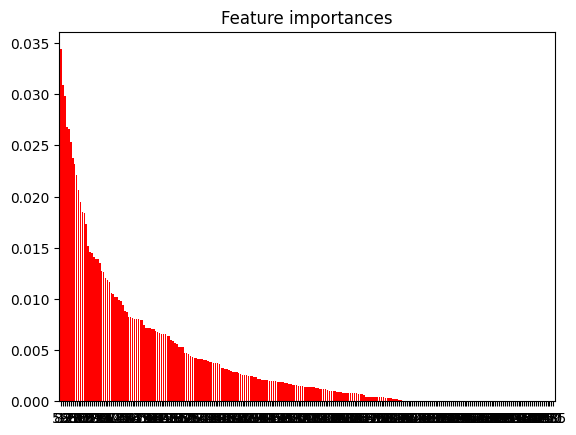

In [6]:
X = df_verseny_public_train.drop(['target', 'cookie_id'], axis=1)
y = df_verseny_public_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X.columns[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Random forest

Feature ranking:
1. Feature 7 (0.024762) Topic4_ec
2. Feature 68 (0.023879) Topic55_ic
3. Feature 17 (0.023555) Topic12_ec
4. Feature 19 (0.022717) Topic13_ec
5. Feature 21 (0.022407) Topic14_ec
6. Feature 83 (0.021898) Topic63_ec
7. Feature 6 (0.021256) Topic4_ic
8. Feature 82 (0.021215) Topic63_ic
9. Feature 71 (0.020351) Topic56_ec
10. Feature 18 (0.019905) Topic13_ic
11. Feature 20 (0.019707) Topic14_ic
12. Feature 70 (0.019690) Topic56_ic
13. Feature 59 (0.019425) Topic42_ec
14. Feature 16 (0.019330) Topic12_ic
15. Feature 4 (0.017696) Topic3_ic
16. Feature 66 (0.017207) Topic54_ic
17. Feature 69 (0.016455) Topic55_ec
18. Feature 61 (0.016366) Topic51_ec
19. Feature 67 (0.016179) Topic54_ec
20. Feature 28 (0.014355) Topic19_ic
21. Feature 29 (0.013563) Topic19_ec
22. Feature 1 (0.011486) Topic1_ec
23. Feature 12 (0.011414) Topic9_ic
24. Feature 35 (0.011406) Topic24_ec
25. Feature 5 (0.011063) Topic3_ec
26. Feature 105 (0.010690) Topic74_ec
27. Feature 14 (0.010611) Topic10_ic
28.

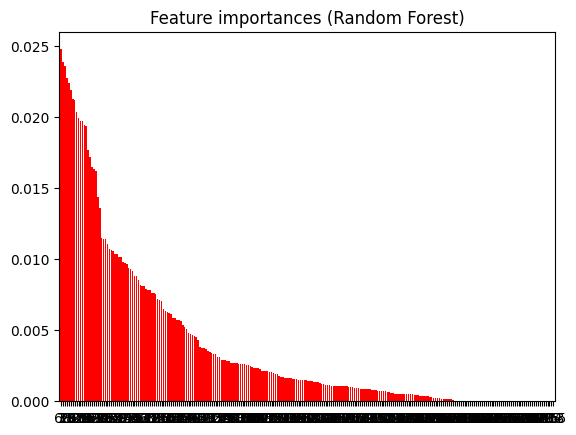

In [7]:
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)


importances_rf = clf_rf.feature_importances_


indices_rf = np.argsort(importances_rf)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]], X.columns[indices_rf[f]]))

plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(X.shape[1]), importances_rf[indices_rf],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices_rf)
plt.xlim([-1, X.shape[1]])
plt.show()

In [8]:
# Create DataFrames for feature importances
dt_feature_importances = pd.DataFrame({'Feature': indices, 'Importance_DT': importances[indices]})
rf_feature_importances = pd.DataFrame({'Feature': indices_rf, 'Importance_RF': importances_rf[indices_rf]})

# Merge DataFrames on the 'Feature' column
merged_feature_importances = pd.merge(dt_feature_importances, rf_feature_importances, on='Feature')

print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
     Feature  Importance_DT  Importance_RF
0         59       0.034382   1.942473e-02
1         82       0.030857   2.121503e-02
2         17       0.029825   2.355525e-02
3          7       0.026783   2.476174e-02
4         68       0.026546   2.387936e-02
..       ...            ...            ...
251      218       0.000000   0.000000e+00
252      219       0.000000   0.000000e+00
253      220       0.000000   8.306329e-09
254      221       0.000000   0.000000e+00
255      255       0.000000   0.000000e+00

[256 rows x 3 columns]


In [9]:
percentile_threshold = 0.8

importance_threshold_dt = merged_feature_importances['Importance_DT'].quantile(percentile_threshold)
importance_threshold_rf = merged_feature_importances['Importance_RF'].quantile(percentile_threshold)

print("Threshold value based on the top", int(percentile_threshold * 100), "percentileDT:", importance_threshold_dt, "percentileRF:", importance_threshold_rf)


Threshold value based on the top 80 percentileDT: 0.006672178844029693 percentileRF: 0.007156515748080775


In [10]:
merged_feature_importances = merged_feature_importances[(merged_feature_importances['Importance_DT'] > importance_threshold_dt) & (merged_feature_importances['Importance_RF'] > importance_threshold_rf)]
print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
    Feature  Importance_DT  Importance_RF
0        59       0.034382       0.019425
1        82       0.030857       0.021215
2        17       0.029825       0.023555
3         7       0.026783       0.024762
4        68       0.026546       0.023879
5        83       0.025374       0.021898
6         6       0.023795       0.021256
7        21       0.023135       0.022407
8        66       0.022146       0.017207
9        16       0.020672       0.019330
10       70       0.019442       0.019690
11       61       0.018478       0.016366
12       19       0.018344       0.022717
13       28       0.017347       0.014355
14       71       0.015163       0.020351
15       18       0.014617       0.019905
16       29       0.014482       0.013563
17       63       0.014118       0.010539
18       69       0.013903       0.016455
19       20       0.013900       0.019707
20      135       0.013469       0.007189
21       12       0.012760       0.011414
22    

In [11]:
X = X.drop(X.columns.difference(X.columns[merged_feature_importances['Feature']]), axis=1)


In [12]:
len(X.columns)

47

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell building - Random forest and AdaBoost with Voting

In [14]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

# Define base classifiers
base_rf = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42, criterion='entropy', max_features='log2', oob_score=True)
base_ada = AdaBoostClassifier(n_estimators=100, random_state=42, learning_rate=1.1)

# Create the VotingClassifier with majority voting
voting_clf = VotingClassifier(estimators=[('rf', base_rf), ('ada', base_ada)], voting='soft')

# Fit the VotingClassifier on the training data
voting_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_voting = voting_clf.predict(X_test)

# Calculate accuracy
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Accuracy (Voting Classifier):", accuracy_voting)


/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy (Voting Classifier): 0.98525


# Test set

In [15]:
df_verseny_public_test = pd.read_csv('data/verseny_public_test.csv', sep=',', low_memory=False)

# Random forest

In [16]:
X_test_test = df_verseny_public_test.drop(['cookie_id'], axis=1)

X_test_test = X_test_test.drop(X_test_test.columns.difference(X.columns), axis=1)

y_pred_rf = voting_clf.predict_proba(X_test_test)[:, 1]

df_verseny_public_test['target'] = y_pred_rf

df_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]

df_verseny_public_test.to_csv('data/prediction_random_forest_w_adaboost_voting_80_param.csv', index=False)